# Classification

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import rdkit, rdkit.Chem, rdkit.Chem.Draw
import numpy as np
import jax.numpy as jnp
# import mordred, mordred.descriptors
import jax
# import dmol

## 4.1 Data

In [4]:
# from zipfile import ZipFile
# from io import BytesIO
# from urllib.request import urlopen

# from web version
# url = 'https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/clintox.csv.gz'
# file = urlopen(url).read()
# file = BytesIO(file)
# document = ZipFile(file)
# toxdata = pd.read_csv(document.open('clintox.csv'))

# local version
toxdata = pd.read_csv("data/clintox.csv.gz")
toxdata.head()

,smiles,FDA_APPROVED,CT_TOX
0,*C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0
3,[H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...,1,0
4,[H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...,1,0


## molecular descriptors

[23:27:55] Explicit valence for atom # 0 N, 5, is greater than permitted
[23:27:55] Can't kekulize mol.  Unkekulized atoms: 9
[23:27:55] Can't kekulize mol.  Unkekulized atoms: 4
[23:27:55] Can't kekulize mol.  Unkekulized atoms: 4


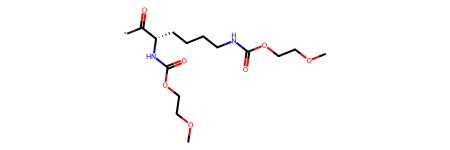

In [5]:
# make object that can compute descriptors
# calc = mordred.Calculator(mordred.descriptors, ignore_3D=True)
# make subsample from pandas df
molecules = [rdkit.Chem.MolFromSmiles(smi) for smi in toxdata.smiles]

# view one molecule to make sure things look good.
molecules[0]

In [6]:
# the invalid molecules were None, so we'll just
# use the fact the None is False in Python
valid_mol_idx = [bool(m) for m in molecules]
valid_mols = [m for m in molecules if m]

In [7]:
features = calc.pandas(valid_mols)

NameError: name 'calc' is not defined

In [8]:
labels = toxdata[valid_mol_idx].FDA_APPROVED
features -= features.mean()
features /= features.std()

# we have some nans in features, likely because std was 0
features.dropna(inplace=True, axis=1)

print(f"We have {len(features.columns)} features per molecule")

NameError: name 'features' is not defined

## 4.4 Classification models

In [9]:
def perceptron(x, w, b):
    v = jnp.dot(x, w) + b
    y = jnp.where(v > 0, x=jnp.ones_like(v), y=jnp.zeros_like(v))
    return y

In [10]:
def loss(y, yhat):
    return jnp.mean(jnp.abs(y - yhat))


def loss_wrapper(w, b, x, y):
    yhat = perceptron(x, w, b)
    return loss(y, yhat)


loss_grad = jax.grad(loss_wrapper, (0, 1))

In [11]:
batch_size = 32
train_N = int(len(labels) * 0.8)


N = len(labels)
batch_idx = range(0, train_N, batch_size)
w = np.random.normal(size=len(features.columns))
b = 0.0

loss_grad = jax.grad(loss_wrapper, (0, 1))


test_x = features[train_N:].values.astype(np.float32)
test_y = labels[train_N:].values

NameError: name 'features' is not defined

In [ ]:
loss_grad(w, b, test_x, test_y)

# Exercise